<a href="https://colab.research.google.com/github/parthgiri01/WEEK-4-TEST/blob/main/Lab3_Classification_(KNN)_and_its_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 3's Session for CMP7239 Applied Machine Learning

# Dr Mohamed Ihmeida

# Classification and its metrics



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Learning Outcomes

* Review Python concepts

* Working on EDA

* Implementing KNN classifer with two cyber security datasets

* Understand the classifications metrics


## Python Review

Python Conditions and If statements
Python supports the usual logical conditions from mathematics:

* Equals: a == b
* Not Equals: a != b
* Less than: a < b
* Less than or equal to: a <= b
* Greater than: a > b
* Greater than or equal to: a >= b

These conditions can be used in several ways, most commonly in "if statements" and loops

***Ecxercise1***

Use different value for `a` and `b` and use some of logical conditions from mathematics above.

In [ ]:
a = 10
b = 20

if a == b:
    print("a is equal to b")
else:
    print("a is not equal to b")

if a != b:
    print("a is not equal to b")

if a < b:
    print("a is less than b")

if a <= b:
    print("a is less than or equal to b")

if a > b:
    print("a is greater than b")
else:
    print("a is not greater than b")

if a >= b:
    print("a is greater than or equal to b")
else:
    print("a is not greater than or equal to b")


a is not equal to b
a is not equal to b
a is less than b
a is less than or equal to b
a is not greater than b
a is not greater than or equal to b


***Review array concept***

* What is an Array?

* An array is a special variable, which can hold more than one value at a time.

* If you have a list of items (a list of car names, for example), storing the cars in single variables could look like this:

# You need to write this code before adding you code:
car1 = "Ford"
car2 = "Volvo"
car3 = "BMW"

However, what if you want to loop through the cars and find a specific one? And what if you had not 3 cars, but 300?

The solution is an array!

An array can hold many values under a single name, and you can access the values by referring to an index number.

In [ ]:
cars = ["Ford", "Volvo", "BMW"]

# Access the first car (index starts at 0)
print(cars[0])  # Output: Ford

# Loop through the list and print each car
for car in cars:
    print(car)





Ford
Ford
Volvo
BMW


***Review For loop, If condition and logical mathimatical statment***

Write code using `For loop` iterating over a sequence of `list` of fruits (choose three fruits such Apple, banana and orange)

print each item of your list and break when you reach to second item which banana in this case!



In [ ]:
fruits = ["Apple", "Banana", "Orange"]

for fruit in fruits:
    print(fruit)
    if fruit == "Banana":
        break


Apple
Banana


In this lab's session, we will work on EDA and KNN using Scikit-learn.

a step‐by‐step outline you can follow for both a Spam vs. Unspam task and an Intrusion vs. Normal task using:

1. pandas to read CSV

2. matplotlib to visualize

3. scikit-learn’s KNN to classify

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# 2. Load your CSV
# Example for spam dataset
spam_df = pd.read_csv('/spam.csv')

# # Example for intrusion dataset
# intrusion_df = pd.read_csv('intrusion.csv')


In [ ]:
# 3. Quick data exploration
# See first few rows
print(spam_df.head())
print(spam_df['label'].value_counts())

# print(intrusion_df.head())
# print(intrusion_df['label'].value_counts())


   length  num_links   label
0      54          1  unspam
1      48          0  unspam
2      56          0  unspam
3      65          2  unspam
4      47          2  unspam
label
unspam    2000
spam      2000
Name: count, dtype: int64


Questions to ask yourself:
1. Are there missing values?

2. Is the data balanced (similar numbers of each class)?

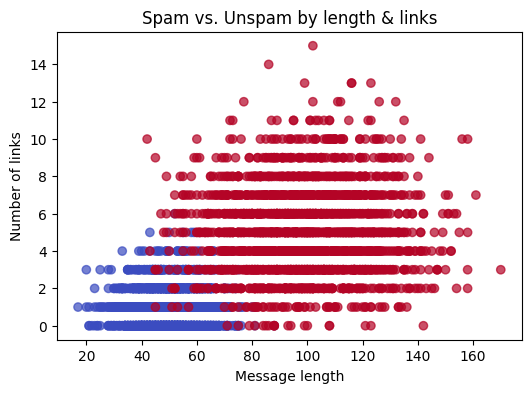

In [ ]:
## Visualize with matplotlib
#Pick two numeric features (e.g. “length” vs. “num_links” in spam):

plt.figure(figsize=(6,4))
plt.scatter(spam_df['length'], spam_df['num_links'],
            c=spam_df['label'].map({'spam':1,'unspam':0}),
            cmap='coolwarm', alpha=0.7)
plt.xlabel('Message length')
plt.ylabel('Number of links')
plt.title('Spam vs. Unspam by length & links')
plt.show()


In [ ]:
# Pre-process & split
# Features / labels for spam
X_spam = spam_df[['length','num_links']]
y_spam = spam_df['label'].map({'spam':1,'unspam':0})

# # Features / labels for intrusion
# X_int = intrusion_df[['bytes_sent','packets_received']]
# y_int = intrusion_df['label'].map({'intrusion':1,'normal':0})

# Split (80% train / 20% test)
Xsp_train, Xsp_test, ysp_train, ysp_test = train_test_split(
    X_spam, y_spam, test_size=0.2, random_state=42)

# Xint_train, Xint_test, yint_train, yint_test = train_test_split(
#     X_int, y_int, test_size=0.2, random_state=42)


In [ ]:
# Train a KNN classifier
# Instantiate with k=5
knn_spam = KNeighborsClassifier(n_neighbors=5)
knn_spam.fit(Xsp_train, ysp_train)

# knn_int = KNeighborsClassifier(n_neighbors=5)
# knn_int.fit(Xint_train, yint_train)


KNeighborsClassifier()

In [ ]:
# Evaluate performance
# Spam
ysp_pred = knn_spam.predict(Xsp_test)
print("Spam classification report:")
print(classification_report(ysp_test, ysp_pred))
print("Confusion matrix:\n", confusion_matrix(ysp_test, ysp_pred))

# # Intrusion
# yint_pred = knn_int.predict(Xint_test)
# print("Intrusion classification report:")
# print(classification_report(yint_test, yint_pred))
# print("Confusion matrix:\n", confusion_matrix(yint_test, yint_pred))


Spam classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       422
           1       0.98      0.97      0.97       378

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800

Confusion matrix:
 [[413   9]
 [ 10 368]]


***Summary***

1. Import all needed libraries

2. Load your CSV into a pandas DataFrame

3. Explore: .head(), .info(), .value_counts()

4. Visualize raw data with matplotlib scatter plots

5. Pre-process: select features & encode labels

6. Split into train/test sets

7. Train KNN (.fit)

8. Predict & evaluate with classification report & confusion matrix

9. Save the model.

10. Plot decision boundaries to see how KNN partitions feature space (optional).

# **Your Task**
1. To understand the previous steps with Spam dataset and do the same with the
intrusion dataset.
2. Download the datasets from the lab folder in Week3.
3. After your implement the EDA and KNN, try to save the model (this will really help in CW1)
4. Don't forget to submit your work to Week3 submission point.

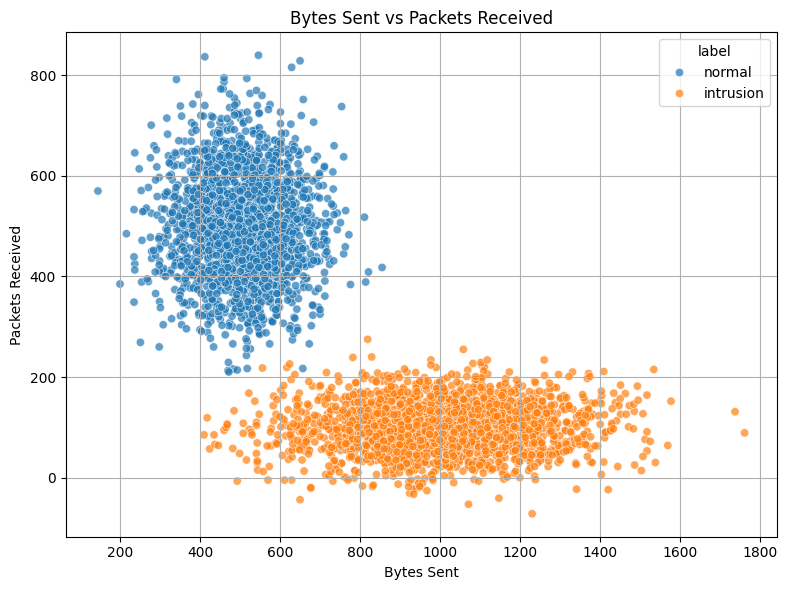

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       378

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Confusion Matrix:
 [[422   0]
 [  0 378]]
Model saved as knn_intrusion_model.joblib


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# 1. Load the dataset
intrusion_df = pd.read_csv('/Intrusion dataset.csv')

# 2. Visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=intrusion_df,
    x='bytes_sent',
    y='packets_received',
    hue='label',
    alpha=0.7
)
plt.title("Bytes Sent vs Packets Received")
plt.xlabel("Bytes Sent")
plt.ylabel("Packets Received")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Preprocess the data
intrusion_df['label'] = intrusion_df['label'].map({'intrusion': 1, 'normal': 0})
X_int = intrusion_df[['bytes_sent', 'packets_received']]
y_int = intrusion_df['label']

# 4. Split the data
Xint_train, Xint_test, yint_train, yint_test = train_test_split(
    X_int, y_int, test_size=0.2, random_state=42
)

# 5. Train the model
knn_int = KNeighborsClassifier(n_neighbors=5)
knn_int.fit(Xint_train, yint_train)

# 6. Evaluate the model
yint_pred = knn_int.predict(Xint_test)
print("Classification Report:\n", classification_report(yint_test, yint_pred))
print("Confusion Matrix:\n", confusion_matrix(yint_test, yint_pred))

# 7. Save the trained model
joblib.dump(knn_int, 'knn_intrusion_model.joblib')
print("Model saved as knn_intrusion_model.joblib")
